In [106]:
import ptitprince as pt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import numpy as np
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr, f_oneway, tukey_hsd, kruskal, spearmanr
import scikit_posthocs as sp

#### (Test) All Categories

In [107]:
data = pd.read_csv('topics-post-RADAR-data.csv')

columns_to_keep = ['STUD_REFORMATTED', 'STUD_RED_RADAR','STUD_ALL_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR',
                   'GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

melted_data = data[columns_to_keep]

melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')

<Axes: xlabel='RADAR_output', ylabel='Category'>

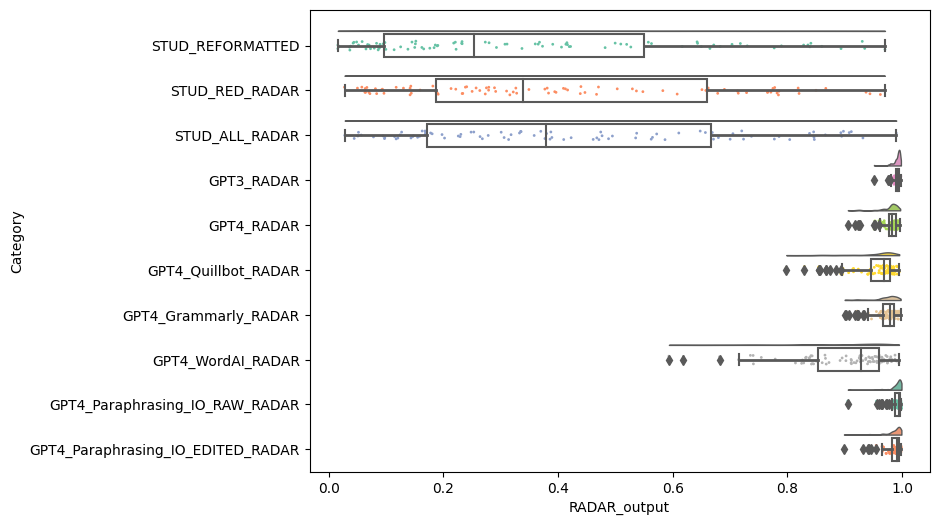

In [108]:
f, ax = plt.subplots(figsize=(8, 6))
pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='h', point_size=2, width_box=0.5)

<Axes: xlabel='Category', ylabel='RADAR_output'>

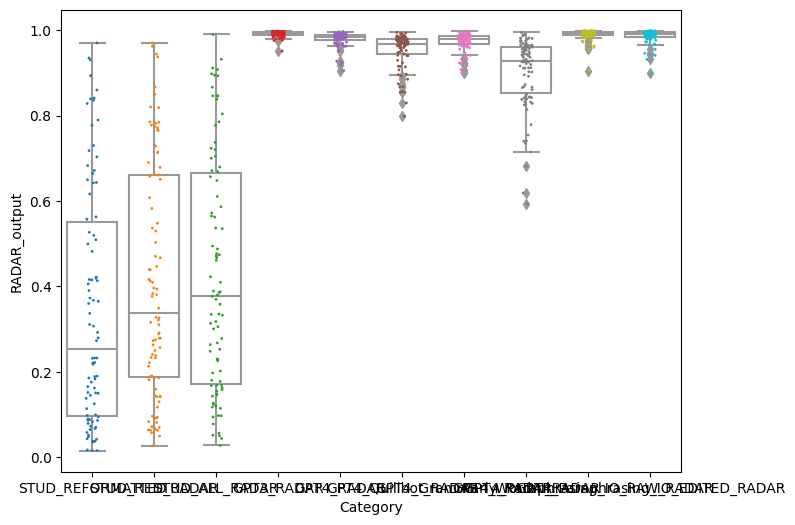

In [109]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=melted_data, x = 'Category', y = 'RADAR_output', size=2)
sns.boxplot(data=melted_data, x = 'Category', y = 'RADAR_output', color='White')

#### Raw HWT vs MGTs

[[Text(0, 0, 'Human'), Text(1, 0, 'GPT3'), Text(2, 0, 'GPT4')]]

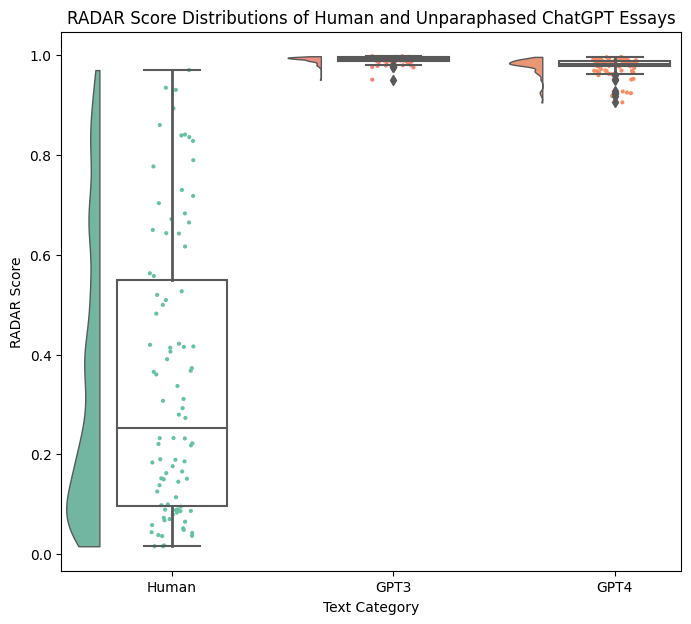

In [110]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED', 'GPT3_RADAR', 'GPT4_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
custom_colors = {'STUD_REFORMATTED': '#66c2a5', 'GPT3_RADAR': '#fb8072', 'GPT4_RADAR': '#fc8d62'}
g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count', palette=custom_colors)
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Human and Unparaphased ChatGPT Essays')
g.set(xticklabels=['Human','GPT3', 'GPT4'])

#### Paraphrased MGTs

(0.0, 1.0)

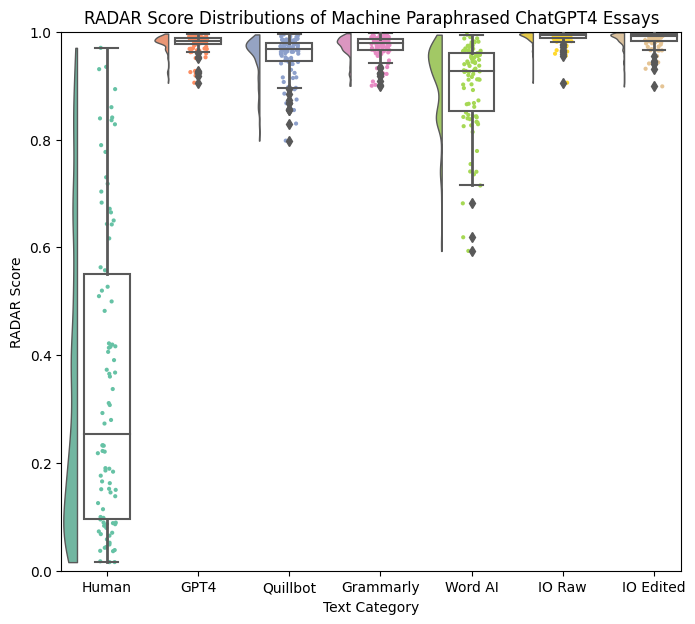

In [111]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED','GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
                   'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count')
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Machine Paraphrased ChatGPT4 Essays')
g.set(xticklabels=['Human','GPT4', 'Quillbot', 'Grammarly', 'Word AI', 'IO Raw', 'IO Edited'])
plt.ylim(0,1)

#### Paraphrased HWT

(0.0, 1.0)

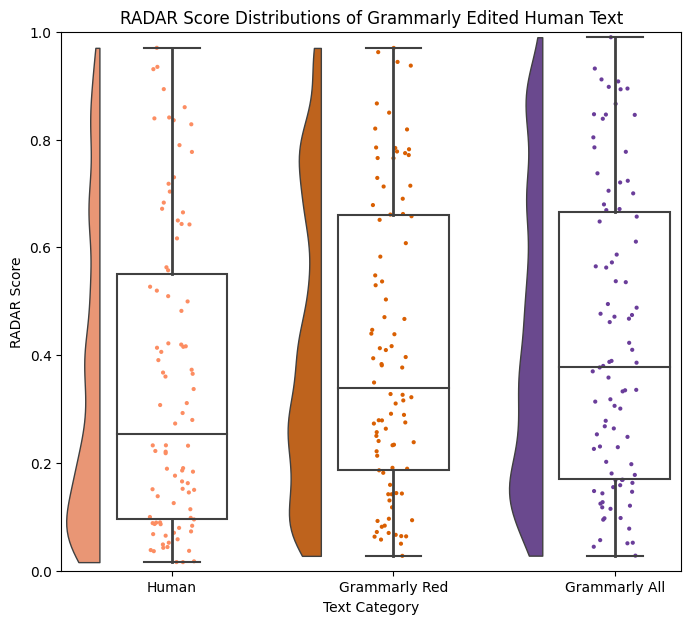

In [112]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED','STUD_RED_RADAR','STUD_ALL_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))

custom_colors = {'STUD_REFORMATTED': '#fc8d62', 'STUD_RED_RADAR': '#d95f02', 'STUD_ALL_RADAR': '#6a3d9a'}

g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count', palette=custom_colors)
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Grammarly Edited Human Text')
g.set(xticklabels=['Human','Grammarly Red', 'Grammarly All'])
plt.ylim(0,1)

#### Is there an optimal RADAR cut-off?

In [113]:
data = pd.read_csv('topics-post-RADAR-data.csv')
test = {
    'RADAR_threshold' : [x / 100 for x in range(101)],
    'HWT FP' : [(data['STUD_REFORMATTED'] > (x / 100)).sum() / 90 * 100 for x in range(101)],
    'GPT4 FN' : [(data['GPT4_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'GPT3 FN' : [(data['GPT3_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'WordAI FN' : [(data['GPT4_WordAI_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'Quillbot FN': [(data['GPT4_Quillbot_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)]
}

data = pd.DataFrame(test)
melted = pd.melt(data, id_vars=['RADAR_threshold'])

In [114]:
data.tail(11)

,RADAR_threshold,HWT FP,GPT4 FN,GPT3 FN,WordAI FN,Quillbot FN
90,0.90,3.333333,0.000000,0.000000,33.333333,13.333333
91,0.91,3.333333,1.111111,0.000000,35.555556,14.444444
92,0.92,3.333333,2.222222,0.000000,42.222222,17.777778
93,0.93,3.333333,5.555556,0.000000,51.111111,20.000000
94,0.94,1.111111,5.555556,0.000000,56.666667,20.000000
95,0.95,1.111111,5.555556,0.000000,65.555556,28.888889
96,0.96,1.111111,8.888889,1.111111,73.333333,35.555556
97,0.97,1.111111,20.000000,1.111111,85.555556,53.333333
98,0.98,0.000000,31.111111,6.666667,91.111111,77.777778
99,0.99,0.000000,83.333333,31.111111,97.777778,94.444444


Text(0.5, 0, 'Potential RADAR Threshold')

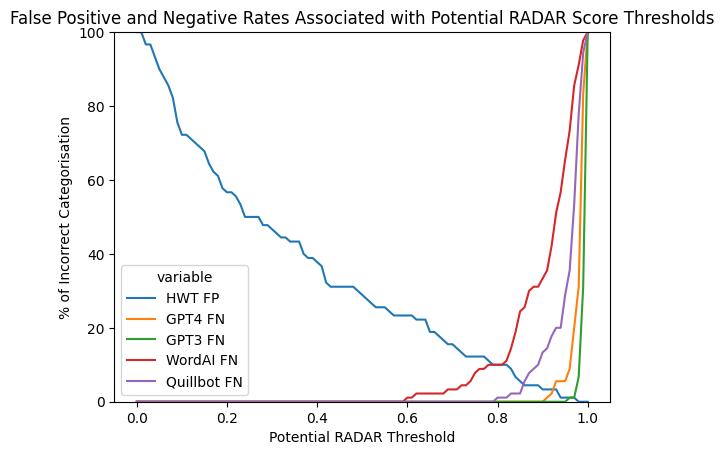

In [115]:
sns.lineplot(data=melted, x='RADAR_threshold', y = 'value', hue='variable')
plt.ylim(0,100)
plt.title('False Positive and Negative Rates Associated with Potential RADAR Score Thresholds')
plt.ylabel('% of Incorrect Categorisation')
plt.xlabel('Potential RADAR Threshold')

#### Weber Wulff Comparison

Text(0.5, 1.0, 'RADAR Accuracy for All Text Categories Using Weber-Wulff et al. (2023) Formulas')

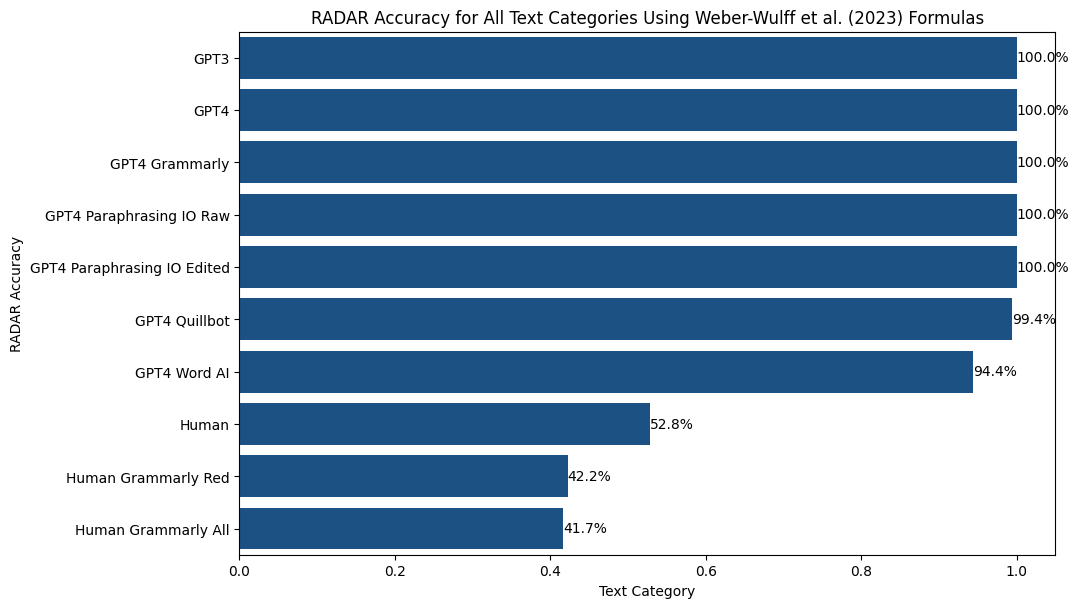

In [116]:
data = pd.read_csv('topics-post-RADAR-data.csv')

HWT_categories = ['STUD_REFORMATTED','STUD_RED_RADAR','STUD_ALL_RADAR']
MGT_categories = ['GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 
                  'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

accuracies = {}

for paraphraser in MGT_categories:
    scores = data[paraphraser]
    acc_1 = (scores > 0.8).sum() / 90 * 100
    acc_2 = (scores > 0.6).sum() / 90 * 100 
    acc_3 = ((scores > 0.8).sum() +  0.5 * ((scores > 0.6).sum() - (scores > 0.8).sum())) / 90 * 100
    result = (acc_1 + acc_2 + acc_3) / 300
    accuracies[paraphraser] = result

for paraphraser in HWT_categories:
    scores = data[paraphraser]
    acc_1 = (scores < 0.2).sum() / 90 * 100
    acc_2 = (scores < 0.4).sum() / 90 * 100 
    acc_3 = ((scores < 0.2).sum() +  0.5 * ((scores < 0.4).sum() - (scores < 0.2).sum())) / 90 * 100
    result = (acc_1 + acc_2 + acc_3) / 300
    accuracies[paraphraser] = result

accuracies = dict(sorted(accuracies.items(), key=lambda x:x[1], reverse=True))
x = list(accuracies.values())
y = list(accuracies.keys())
ax = sns.barplot(data=None, x=x, y=y, color='#0b5394')
for i in ax.containers:
    ax.bar_label(i, fmt='{:.1%}')
plt.subplots_adjust(top=1.2, right=1.4)
plt.xlabel('Text Category')
plt.ylabel('RADAR Accuracy')
ax.set_yticklabels(['GPT3','GPT4','GPT4 Grammarly','GPT4 Paraphrasing IO Raw', 'GPT4 Paraphrasing IO Edited', 
                    'GPT4 Quillbot', 'GPT4 Word AI', 'Human', 'Human Grammarly Red',
                    'Human Grammarly All'])
plt.title('RADAR Accuracy for All Text Categories Using Weber-Wulff et al. (2023) Formulas')


#### Text Length vs RADAR

In [117]:
pal = sns.color_palette('husl', n_colors=11)
print(pal.as_hex())

['#f77189', '#e18632', '#b59a32', '#8ba731', '#32b258', '#35ae95', '#37abb2', '#39a7d6', '#8f93f4', '#db70f4', '#f667c6']


Text(0, 0.5, 'RADAR Output')

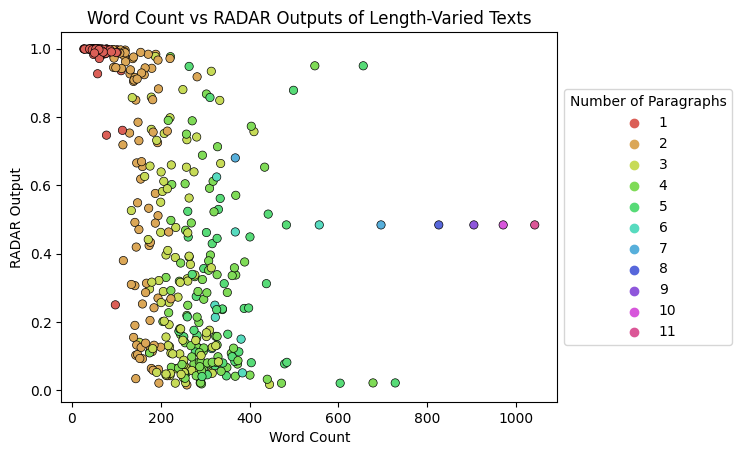

In [118]:
text_length_data = pd.read_csv('topics-length-specific-RADAR.csv')
text_length_data['paragraph_id'] += 1

colors = ['#db5f57', '#dba757', '#c7db57', '#7fdb57', '#57db77', '#57dbbf', '#57afdb', '#5767db', '#8f57db', '#d757db', '#db5797']

sns.scatterplot(data=text_length_data, 
                x=text_length_data['word_count'], 
                y=text_length_data['RADAR_outputs'], 
                hue=text_length_data['paragraph_id'],
                palette=colors,
                edgecolor='Black'
                )

# Move the legend to a new location
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Number of Paragraphs', edgecolor='0.8')
plt.title('Word Count vs RADAR Outputs of Length-Varied Texts')
plt.xlabel('Word Count')
plt.ylabel('RADAR Output')

#### AUROC

In [119]:
categories = ['STUD_REFORMATTED', 'STUD_RED_RADAR','STUD_ALL_RADAR',
              'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 
                'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR'] 

# Example data
n = 3 # number of human data categories
y_true = [0] * n * 90 + [1] * (len(categories) - n) * 90  # True labels
y_score = []

for category in categories:
    y_score = y_score + (list(data[category]))

# Calculate AUROC
auroc_score = roc_auc_score(y_true, y_score)
print("AUROC Score:", auroc_score)

AUROC Score: 0.9876543209876543


In [120]:
categories = ['STUD_REFORMATTED', 'GPT3_RADAR', 'GPT4_RADAR'] 

# Example data
n = 1 # number of human data categories
y_true = [0] * n * 90 + [1] * (len(categories) - n) * 90  # True labels
y_score = []

for category in categories:
    y_score = y_score + (list(data[category]))

# Calculate AUROC
auroc_score = roc_auc_score(y_true, y_score)
print("AUROC Score:", auroc_score)

AUROC Score: 0.9982098765432099


In [121]:
categories = ['STUD_REFORMATTED','GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 
                'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR'] 

# Example data
n = 1 # number of human data categories
y_true = [0] * n * 90 + [1] * (len(categories) - n) * 90  # True labels
y_score = []

for category in categories:
    y_score = y_score + (list(data[category]))

# Calculate AUROC
auroc_score = roc_auc_score(y_true, y_score)
print("AUROC Score:", auroc_score)

AUROC Score: 0.9906701940035273


#### Krusky and Dunn

In [124]:
# Perform Kruskal
print(kruskal(data['STUD_REFORMATTED'], data['GPT3_RADAR'],  data['GPT4_RADAR']))

KruskalResult(statistic=205.1463095075395, pvalue=2.8382124385636436e-45)


In [125]:
paraphasedMGTData = [data['STUD_REFORMATTED'], data['GPT3_RADAR'],  data['GPT4_RADAR']]
p_values = sp.posthoc_dunn(paraphasedMGTData, p_adjust='bonferroni')
p_values = pd.DataFrame(p_values)
p_values

,1,2,3
1,1.000000e+00,4.965600e-45,1.033574e-18
2,4.965600e-45,1.000000e+00,5.818919e-07
3,1.033574e-18,5.818919e-07,1.000000e+00


In [126]:
print(kruskal( data['GPT4_RADAR'],  data['GPT4_Paraphrasing_IO_RAW_RADAR'],data['GPT4_Paraphrasing_IO_EDITED_RADAR'],  data['GPT4_Quillbot_RADAR'],
               data['GPT4_Grammarly_RADAR'],  data['GPT4_WordAI_RADAR']))

KruskalResult(statistic=259.7009057718275, pvalue=4.551986572115167e-54)


In [144]:
paraphasedMGTData = [data['GPT4_RADAR'], data['GPT4_Quillbot_RADAR'], data['GPT4_WordAI_RADAR'], data['GPT4_Grammarly_RADAR'],  
                data['GPT4_Paraphrasing_IO_RAW_RADAR'],data['GPT4_Paraphrasing_IO_EDITED_RADAR']]
p_values = sp.posthoc_dunn(paraphasedMGTData, p_adjust='bonferroni')
p_values = pd.DataFrame(p_values)
p_values

,1,2,3,4,5,6
1,1.000000e+00,2.735751e-05,9.233194e-16,1.000000e+00,2.011682e-06,6.307098e-03
2,2.735751e-05,1.000000e+00,4.956657e-03,3.884783e-02,1.447359e-22,1.576020e-15
3,9.233194e-16,4.956657e-03,1.000000e+00,6.050929e-10,3.702309e-41,2.022827e-31
4,1.000000e+00,3.884783e-02,6.050929e-10,1.000000e+00,3.042545e-11,1.872505e-06
5,2.011682e-06,1.447359e-22,3.702309e-41,3.042545e-11,1.000000e+00,1.000000e+00
6,6.307098e-03,1.576020e-15,2.022827e-31,1.872505e-06,1.000000e+00,1.000000e+00


In [128]:
print(kruskal(data['STUD_REFORMATTED'], data['STUD_RED_RADAR'], data['STUD_ALL_RADAR']))

KruskalResult(statistic=5.611582160266039, pvalue=0.060458924395805136)


#### Assumption Testing

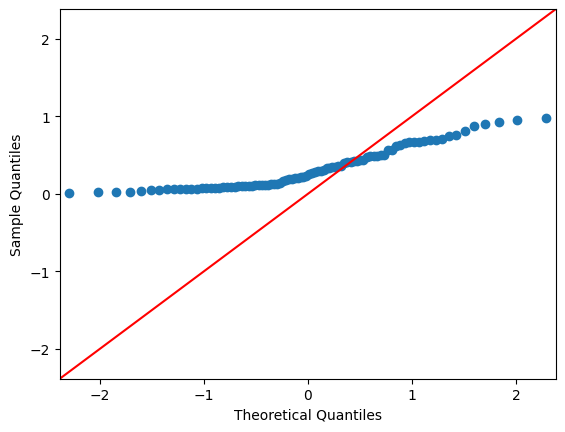

In [129]:
data_points = data['STUD_RADAR']   
sm.qqplot(data_points, line ='45') 
plt.show()

In [130]:
text_length_RADAR = pd.read_csv('topics-length-specific-RADAR.csv')

(array([ 90.,  46.,  31.,  31.,  28.,  18.,  17.,  21.,  10., 127.]),
 array([0.01511072, 0.11355719, 0.21200366, 0.31045013, 0.40889661,
        0.50734308, 0.60578955, 0.70423602, 0.80268249, 0.90112896,
        0.99957544]),
 <BarContainer object of 10 artists>)

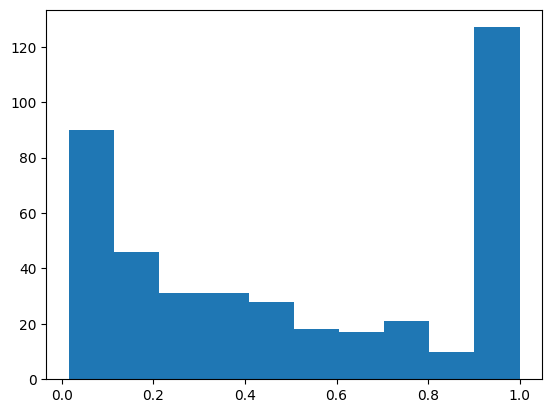

In [131]:
plt.hist(text_length_data['RADAR_outputs'])

(array([ 4., 12., 21., 21., 15., 10.,  8.,  6.,  8.,  3.,  7., 17., 10.,
         9., 14., 13., 10., 11., 15., 14.,  6., 12., 20., 14., 11., 18.,
        12., 13., 11., 17.,  7.,  5.,  3.,  8.,  4.,  3.,  3.,  3.,  0.,
         0.,  4.,  1.,  0.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  27.  ,   37.15,   47.3 ,   57.45,   67.6 ,   77.75,   87.9 ,
          98.05,  108.2 ,  118.35,  128.5 ,  138.65,  148.8 ,  158.95,
         169.1 ,  179.25,  189.4 ,  199.55,  209.7 ,  219.85,  230.  ,
         240.15,  250.3 ,  260.45,  270.6 ,  280.75,  290.9 ,  301.05,
         311.2 ,  321.35,  331.5 ,  341.65,  351.8 ,  361.95,  372.1 ,
         382.25,  392.4 ,  402.55,  412.7 ,  422.85,  433.  ,  443.15,
        

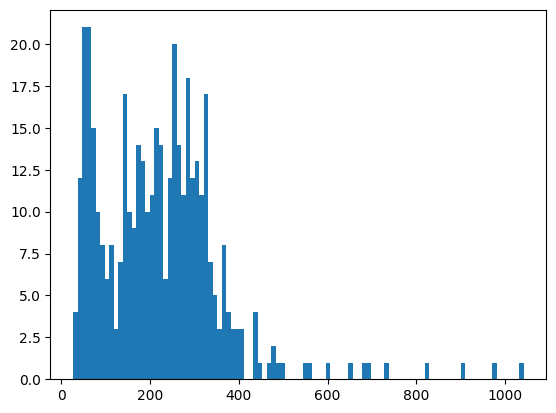

In [132]:
plt.hist(text_length_data['word_count'], bins=100)

In [133]:
# Perform linear correlation test
corr_coeff, p_value = spearmanr(text_length_data['word_count'], 
                               text_length_data['RADAR_outputs'])

# Print the correlation coefficient and p-value
print("Spearman correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Spearman correlation coefficient: -0.6758026668454927
p-value: 3.2719380763899255e-57


In [134]:
# Perform linear correlation test
corr_coeff, p_value = spearmanr(data['Grammarly_Score'], 
                               data['STUD_RADAR'])

# Print the correlation coefficient and p-value
print("Spearman correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Spearman correlation coefficient: 0.15296230810701528
p-value: 0.15005748140662173


#### 5 Num Summaries

In [141]:
column_names = ['STUD_REFORMATTED', 'GPT3_RADAR', 'GPT4_RADAR']

summary_dict = {
    'Column': [],
    'Min': [],
    'Q1': [],
    'Median': [],
    'Q3': [],
    'Max': [],
    'IQR': []
}

for col in column_names:
    if col in data.columns:
        summary_dict['Column'].append(col)
        summary_dict['Min'].append(data[col].min())
        summary_dict['Q1'].append(data[col].quantile(0.25))
        summary_dict['Median'].append(data[col].median())
        summary_dict['Q3'].append(data[col].quantile(0.75))
        summary_dict['Max'].append(data[col].max())
        summary_dict['IQR'].append(data[col].quantile(0.75) - data[col].quantile(0.25))
    else:
        print(f"Column {col} not found in the DataFrame")

summary_df = pd.DataFrame(summary_dict)
summary_df

,Column,Min,Q1,Median,Q3,Max,IQR
0,STUD_REFORMATTED,0.015941,0.095884,0.252884,0.549766,0.970117,0.453882
1,GPT3_RADAR,0.950928,0.989073,0.993044,0.995454,0.997926,0.006381
2,GPT4_RADAR,0.905394,0.977892,0.983262,0.988526,0.996609,0.010634


In [143]:
column_names = ['STUD_REFORMATTED','GPT4_RADAR', 'GPT4_Quillbot_RADAR', 'GPT4_WordAI_RADAR', 'GPT4_Grammarly_RADAR',
                   'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

summary_dict = {
    'Column': [],
    'Min': [],
    'Q1': [],
    'Median': [],
    'Q3': [],
    'Max': [],
    'IQR': []
}

for col in column_names:
    if col in data.columns:
        summary_dict['Column'].append(col)
        summary_dict['Min'].append(data[col].min())
        summary_dict['Q1'].append(data[col].quantile(0.25))
        summary_dict['Median'].append(data[col].median())
        summary_dict['Q3'].append(data[col].quantile(0.75))
        summary_dict['Max'].append(data[col].max())
        summary_dict['IQR'].append(data[col].quantile(0.75) - data[col].quantile(0.25))
    else:
        print(f"Column {col} not found in the DataFrame")

summary_df = pd.DataFrame(summary_dict)
summary_df

,Column,Min,Q1,Median,Q3,Max,IQR
0,STUD_REFORMATTED,0.015941,0.095884,0.252884,0.549766,0.970117,0.453882
1,GPT4_RADAR,0.905394,0.977892,0.983262,0.988526,0.996609,0.010634
2,GPT4_Quillbot_RADAR,0.797935,0.945054,0.968455,0.978390,0.994961,0.033336
3,GPT4_WordAI_RADAR,0.593309,0.852895,0.927844,0.960144,0.994467,0.107249
4,GPT4_Grammarly_RADAR,0.899805,0.966763,0.978943,0.986403,0.997449,0.019640
5,GPT4_Paraphrasing_IO_RAW_RADAR,0.905394,0.988484,0.993910,0.996484,0.998908,0.007999
6,GPT4_Paraphrasing_IO_EDITED_RADAR,0.898614,0.982820,0.991245,0.995056,0.998745,0.012236
